# Modularity and Simulated annealing

**Definition**

The modularity Q of a graph is defined as follows:

$$Q= \sum_{i=1}^{n_c} \left[ \frac{l_c}{m} - \left(\frac{d_c}{2m}\right)^2 \right]$$

where:
- $n_c$ is the number of clusters
- $l_c$ the total number of edges joining vertices of cluster $c$
- $d_c$ the sum of the degrees of the vertices of cluster $c$

**Importation of necessary libraries**


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from Utils import *
from simulated_annealing import *

Our real dataset

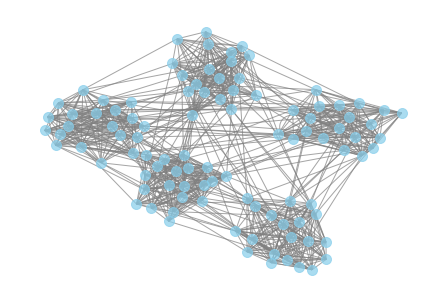

In [88]:
G = nx.relaxed_caveman_graph(5,20, 0.2, seed=None)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=100, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", edge_color="gray", linewidths=1, alpha=0.7)
plt.show()

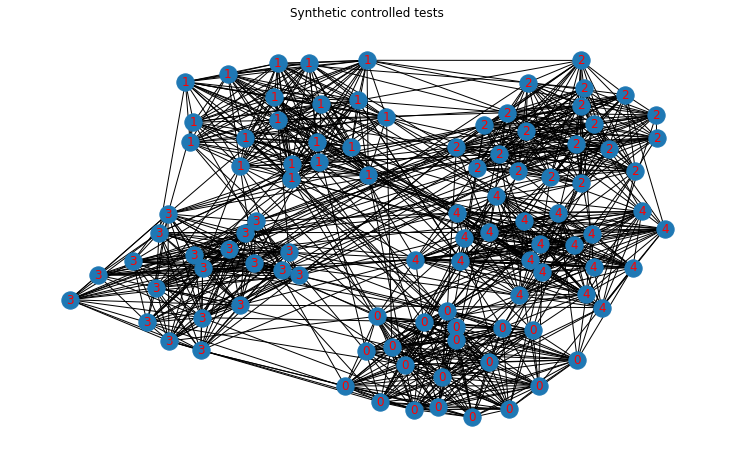

In [103]:

G = generate_known_cluster(100,5,0.7,0.1)
plt.figure(figsize=(10,6))
pos = nx.spring_layout(G)
node_states = nx.get_node_attributes(G, 'spin')
state_pos = {n: (x, y) for n, (x,y) in pos.items()}
nx.draw(G,pos)
nx.draw_networkx_labels(G, state_pos, labels=node_states, font_color='red')
plt.title("Synthetic controlled tests")
plt.show()


Finding best parameters via a grid search

In [18]:
# Appliquer la recherche en grille
iterations = 20
temperature_range = np.arange(3, 7, 1)
cooling_rate_range = np.arange(0.01,0.2,0.02)
k = 5
best_params, best_score = grid_search(G, temperature_range, cooling_rate_range, iterations, k)

print("Meilleurs paramètres:", best_params)
print("Meilleur score de modularité:", best_score)

Temperature range: [3 4 5 6]
Cooling rate range: [0.01 0.03 0.05 0.07 0.09 0.11 0.13 0.15 0.17 0.19]
k: 5


Meilleurs paramètres: {'temperature': 3, 'cooling_rate': 0.12999999999999998, 'iterations': 20, 'k': 5}
Meilleur score de modularité: 0.6198083102493075


In [43]:
k=best_params['k']
temperature=best_params['temperature']
cooling_rate=best_params['cooling_rate']
temperature=5
k=6
iterations=40
initial_partition = {node: random.randint(0,k) for node in G.nodes()}

final_partition, final_score, scores = simulated_annealing(G, initial_partition, temperature, cooling_rate, iterations)

print("Final Partition:", final_partition)
print("Final Modularity Score:", final_score)

Final Partition: {0: 2, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 3, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 3, 21: 3, 22: 3, 23: 3, 24: 3, 25: 3, 26: 3, 27: 3, 28: 3, 29: 3, 30: 3, 31: 3, 32: 3, 33: 3, 34: 3, 35: 3, 36: 3, 37: 3, 38: 3, 39: 3, 40: 4, 41: 4, 42: 4, 43: 4, 44: 4, 45: 4, 46: 4, 47: 4, 48: 4, 49: 4, 50: 4, 51: 4, 52: 4, 53: 4, 54: 4, 55: 4, 56: 4, 57: 4, 58: 4, 59: 4, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 6, 81: 6, 82: 6, 83: 6, 84: 6, 85: 6, 86: 6, 87: 6, 88: 6, 89: 6, 90: 6, 91: 6, 92: 6, 93: 6, 94: 6, 95: 6, 96: 6, 97: 6, 98: 6, 99: 6}
Final Modularity Score: 0.6192897506925209


{0, 2, 3, 4, 6}


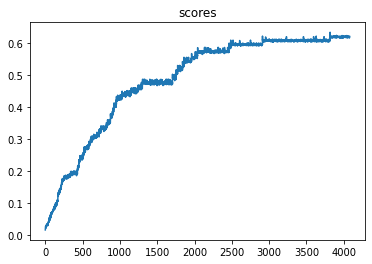

In [44]:
#See evolution of the scores
print(set(final_partition.values()))
plt.plot(scores)
plt.title("scores")
plt.show()

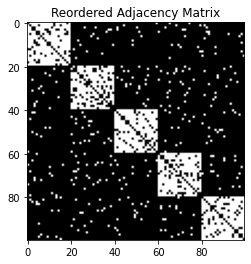

In [45]:
plot_adj(G,final_partition)

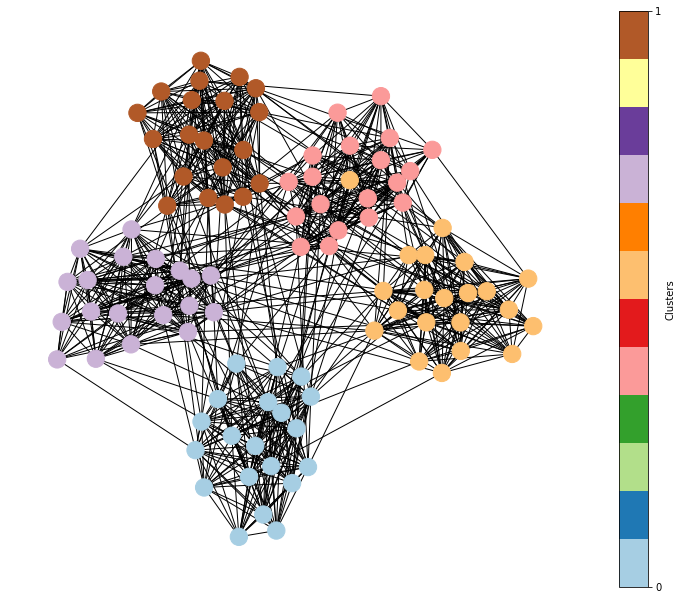

In [46]:
plot_graph(G,final_partition)